# FEMA Disaster Cost Forecasting
#### Capstone 2 - Exploratory Data Analysis
Michael Garber


#### EDA High-Level Steps
1. Build data profiles and tables
    2. Inferential statistics
3. Explore data relationships
    4. Data visualization
5. Feature Selection and Engineering

Goal: Explore the data relationships of all your features and understand how the features compare to the response variable.

#### FEMA Disaster Cost Forecasting Goals
- predict/forecast/risk assess FEMA 2025 costs
- *dependent variable will be the sum of costs that each disaster records. To be defined in step three feature selection

#### Build data profiles and tables
###### Inferential statistics
- summary statistics
- categorical variable counts & review
- visualize/graph columns
- box plot analysis for outliers and anomolies

In [5]:
#import libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
#Load cleaned data
femaDataClean = pd.read_csv('../data/interim/femaMasterData_clean.csv')

#don't display as scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
#display summary statistics table but kill the scientific notation format)
#femaDataClean.describe().apply(lambda s: s.apply('{0:.2f}'.format))
femaDataClean.describe()


,Unnamed: 0,disasterNumber,region,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,totalNumberIaApproved,totalAmountIhpApproved,totalAmountHaApproved,totalAmountOnaApproved,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,totalObligatedAmountHmgp
count,4927.00,4927.00,4927.00,4676.00,4676.00,4676.00,4676.00,4927.00,4927.00,4927.00,4927.00,4927.00,4927.00,4927.00,4927.00
mean,2463.00,2594.18,6.04,0.12,0.30,0.96,0.67,2067.45,6890024.70,4374174.03,2515850.67,48637754.91,26802843.42,18925276.31,2961299.01
std,1422.45,1596.40,2.67,0.33,0.46,0.20,0.47,25552.77,93630759.20,65947934.59,30722013.46,700777444.84,366174013.91,456592044.38,35693954.76
min,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-44312.97,0.00
25%,1231.50,1233.50,4.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2463.00,2468.00,6.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,51448.94,0.00,0.00,0.00
75%,3694.50,4095.50,9.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,4621068.98,741868.62,568868.72,224782.73
max,4926.00,5521.00,10.00,1.00,1.00,1.00,1.00,774691.00,5247169458.98,3745182194.99,1501987263.99,33992346204.64,14531826835.32,26275729062.66,1675655850.57


In [8]:
#comment on 0 value columns
print('3 fields describing spending amounts are all 0, so they can be dropped...\n 1). totalObligatedAmountPa \n 2). totalObligatedAmountCatAb \n 3). totalObligatedAmountCatC2g')

3 fields describing spending amounts are all 0, so they can be dropped...
 1). totalObligatedAmountPa 
 2). totalObligatedAmountCatAb 
 3). totalObligatedAmountCatC2g


In [9]:
femaDataClean.columns

Index(['Unnamed: 0', 'disasterNumber', 'declarationDate', 'disasterName',
       'incidentBeginDate', 'incidentEndDate', 'declarationType', 'stateCode',
       'stateName', 'incidentType', 'entryDate', 'updateDate', 'closeoutDate',
       'region', 'ihProgramDeclared', 'iaProgramDeclared', 'paProgramDeclared',
       'hmProgramDeclared', 'id_x', 'hash_x', 'lastRefresh_x',
       'totalNumberIaApproved', 'totalAmountIhpApproved',
       'totalAmountHaApproved', 'totalAmountOnaApproved',
       'totalObligatedAmountPa', 'totalObligatedAmountCatAb',
       'totalObligatedAmountCatC2g', 'paLoadDate', 'iaLoadDate',
       'totalObligatedAmountHmgp', 'hash_y', 'lastRefresh_y', 'id_y'],
      dtype='object')

In [10]:
#categorical variable anaylsis
#disaster name
print(femaDataClean.disasterName.value_counts())

print("\n*Too many unique values, so this field is probably best not considered a categorical variable")

disasterName
SEVERE STORMS AND FLOODING    299
SEVERE STORMS & FLOODING      273
FLOODING                      109
SEVERE WINTER STORM            96
COVID-19                       83
                             ... 
HORSESHOE TWO FIRE              1
MATT LOOP FIRE                  1
MOOSE MOUNTAIN FIRE             1
CEED FIRE                       1
TORNADO & HEAVY RAINFALL        1
Name: count, Length: 2355, dtype: int64

*Too many unique values, so this field is probably best not considered a categorical variable


declarationType
Major Disaster      2803
Fire Management     1057
Emergency            604
Fire Suppression     463
Name: count, dtype: int64


[Text(0.5, 1.0, 'Count of Declaration type')]

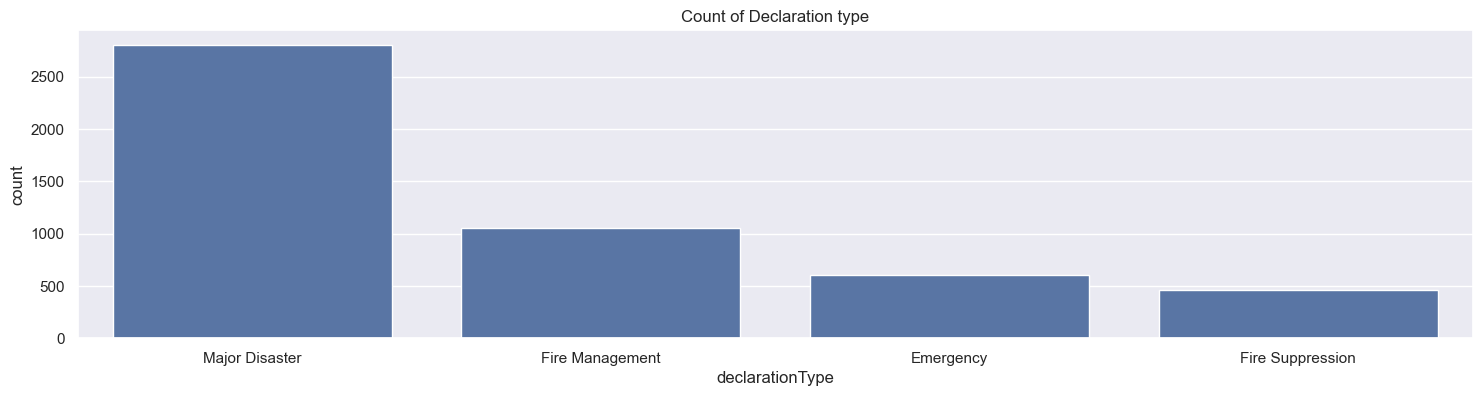

In [11]:
#categorical variable anaylsis
#declarationType
print(femaDataClean.declarationType.value_counts())

#count plot the states and their # of disasters 
## define figure size
sns.set(rc={"figure.figsize":(18, 4)}) #width, height
sns.countplot(data = femaDataClean, x = 'declarationType', order=femaDataClean['declarationType'].value_counts().index).set(title='Count of Declaration type')

incidentType
Fire                 1617
Severe Storm         1083
Flood                 892
Hurricane             443
Tornado               182
Snowstorm             171
Biological            167
Severe Ice Storm       74
Typhoon                63
Drought                46
Earthquake             36
Other                  34
Coastal Storm          31
Freezing               18
Winter Storm           13
Mud/Landslide          12
Tropical Storm          9
Toxic Substances        8
Fishing Losses          6
Volcanic Eruption       6
Dam/Levee Break         6
Human Cause             4
Tsunami                 3
Terrorist               2
Chemical                1
Name: count, dtype: int64


[Text(0.5, 1.0, 'Count of Incident type')]

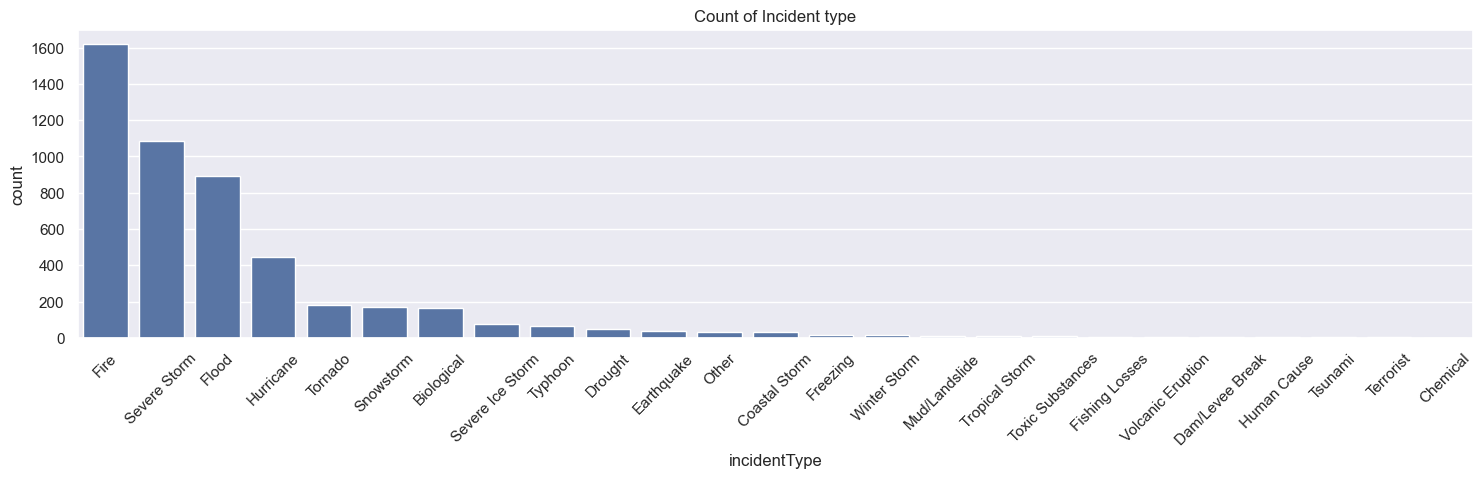

In [12]:
#categorical variable anaylsis
#incident type
print(femaDataClean.incidentType.value_counts())

#count plot the states and their # of disasters 
## define figure size
fig, ax = plt.subplots(figsize=(18, 4))
ax.tick_params(axis='x', labelrotation=45) #nice diagonal x-axis labels
sns.countplot(data = femaDataClean, x = 'incidentType', ax=ax, order=femaDataClean['incidentType'].value_counts().index).set(title='Count of Incident type')

region
6     912
9     765
4     743
10    500
8     459
5     356
7     321
1     320
3     301
2     250
Name: count, dtype: int64


[Text(0.5, 1.0, 'Disasters by FEMA Region #')]

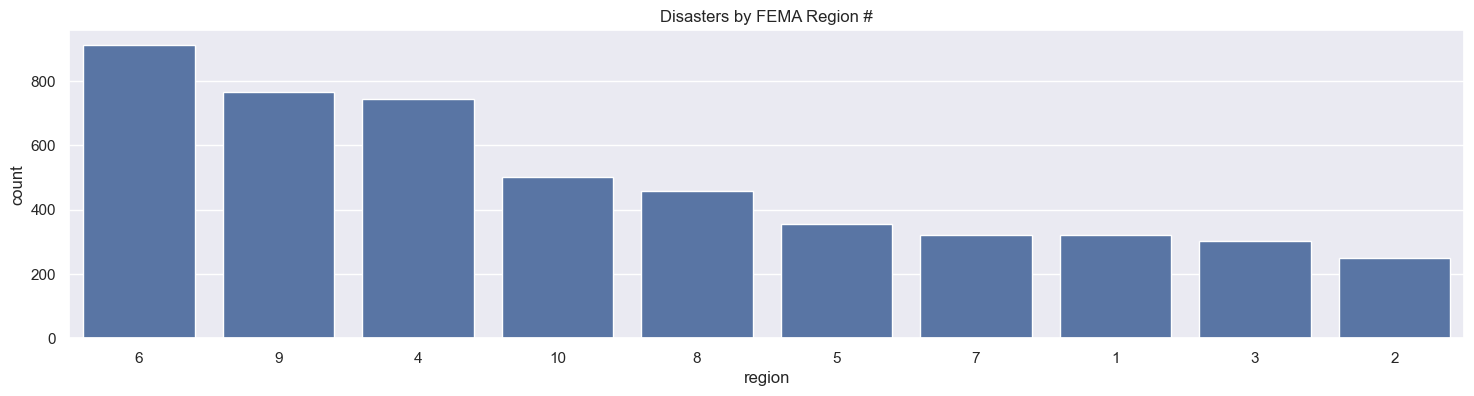

In [13]:
#categorical variable anaylsis
#region (geographic subdivided regious of the US and it's territories)
print(femaDataClean.region.value_counts())

#count plot the regions and their # of disasters 
## define figure size
sns.set(rc={"figure.figsize":(18, 4)}) #width, height
sns.countplot(data = femaDataClean, x = 'region', order=femaDataClean['region'].value_counts().index).set(title='Disasters by FEMA Region #')

stateName
California                        379
Texas                             376
Oklahoma                          230
Washington                        207
Florida                           178
Oregon                            153
New Mexico                        117
Arizona                           115
New York                          112
Louisiana                         106
Nevada                            104
Montana                           103
Colorado                          102
Alabama                           101
Mississippi                        94
Tennessee                          91
South Dakota                       91
Kentucky                           90
Kansas                             86
Alaska                             83
Arkansas                           83
West Virginia                      80
Nebraska                           79
Missouri                           79
Minnesota                          79
Iowa                               77
No

[Text(0.5, 1.0, 'Disaster Count by State')]

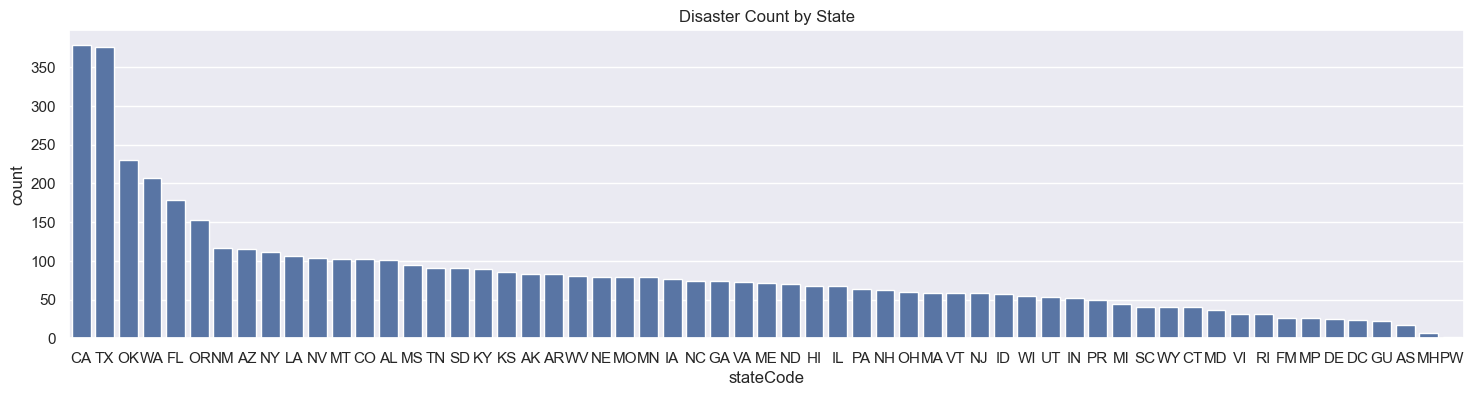

In [14]:
#categorical variable anaylsis
#state name
print(femaDataClean.stateName.value_counts())

#count plot the states and their # of disasters 
## define figure size
sns.set(rc={"figure.figsize":(18, 4)}) #width, height
sns.countplot(data = femaDataClean, x = 'stateCode', order=femaDataClean['stateCode'].value_counts().index).set(title='Disaster Count by State')

In [15]:
#boxplot the numeric (but non-categorical) columns
#sns.boxplot(data=femaDataClean, x=femaDataClean.ihProgramDeclared)

#sns.boxplot(data=femaDataClean, x=femaDataClean.iaProgramDeclared)
#sns.boxplot(data=femaDataClean, x=femaDataClean.paProgramDeclared)
#sns.boxplot(data=femaDataClean, x=femaDataClean.hmProgramDeclared)
#sns.boxplot(data=femaDataClean, x=femaDataClean.totalNumberIaApproved)
#plt.boxplot(femaDataClean.totalAmountIhpApproved)
#sns.boxplot(data=femaDataClean, x=femaDataClean.totalAmountHaApproved)
#plt.scatter(x=range(4912), y=femaDataClean.totalAmountHaApproved)
#sns.boxplot(data=femaDataClean, x=femaDataClean.totalAmountOnaApproved)
#sns.boxplot(data=femaDataClean, x=femaDataClean.totalObligatedAmountHmgp)

#print(femaDataClean['totalAmountHaApproved'])




In [16]:
'''
ihProgramDeclared
iaProgramDeclared
paProgramDeclared
hmProgramDeclared
totalNumberIaApproved
totalAmountIhpApproved
totalAmountHaApproved
totalAmountOnaApproved
totalObligatedAmountHmgp
      
      
'''

'\nihProgramDeclared\niaProgramDeclared\npaProgramDeclared\nhmProgramDeclared\ntotalNumberIaApproved\ntotalAmountIhpApproved\ntotalAmountHaApproved\ntotalAmountOnaApproved\ntotalObligatedAmountHmgp\n      \n      \n'

In [17]:
#col='totalObligatedAmountHmgp'
#plt.scatter(x=range(len(femaDataClean[col])), y=femaDataClean[col])


#### Explore Data Relationships
###### Data Visualizations
- correlation matrix
- heatmap
- https://datagy.io/python-correlation-matrix/

In [19]:
#correlation matrix for fema cost amount data
selectedFields = ['totalAmountIhpApproved', 'totalAmountHaApproved', 'totalAmountOnaApproved','totalObligatedAmountHmgp']
femaCostMatrix = femaDataClean[selectedFields].corr(method='pearson')
#femaDataClean.head()

Axes(0.125,0.11;0.62x0.77)


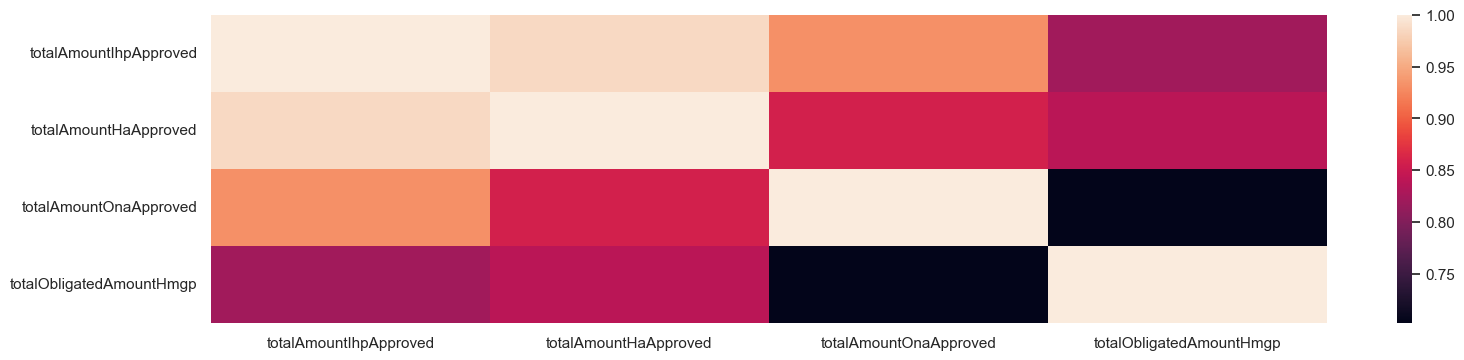

In [20]:
femaCostHeatMap = sns.heatmap(femaCostMatrix)
print(femaCostHeatMap)

In [21]:
# observation of heatmap
print('From the correlation and heatmap we can see all cost/value amounts have a relatively high correlation with each other.')
print('Fields "totalAmountIhpApproved" and "totalAmountHaApproved" have the strongest correlation or all.')

From the correlation and heatmap we can see all cost/value amounts have a relatively high correlation with each other.
Fields "totalAmountIhpApproved" and "totalAmountHaApproved" have the strongest correlation or all.


In [22]:
# calc and store the total cost of totalAmountIhpApproved', 'totalAmountHaApproved', 'totalAmountOnaApproved', 'totalObligatedAmountHmgp'
femaDataCleanV2 = femaDataClean.copy()
femaDataCleanV2['totalDisasterCost'] = femaDataCleanV2['totalAmountIhpApproved'] + femaDataCleanV2['totalAmountHaApproved'] + femaDataCleanV2['totalAmountOnaApproved'] + femaDataCleanV2['totalObligatedAmountHmgp']
femaDataCleanV2

,Unnamed: 0,disasterNumber,declarationDate,disasterName,incidentBeginDate,incidentEndDate,declarationType,stateCode,stateName,incidentType,...,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,paLoadDate,iaLoadDate,totalObligatedAmountHmgp,hash_y,lastRefresh_y,id_y,totalDisasterCost
0,0,4734,2023-08-31T00:00:00.000Z,HURRICANE IDALIA,2023-08-27T00:00:00.000Z,2023-09-04T00:00:00.000Z,Major Disaster,FL,Florida,Hurricane,...,314694009.78,292079797.38,2649609.46,2024-07-30T00:00:00.000Z,2024-07-29T00:00:00.000Z,3210378.19,6686cb66f9085f359342b02866fd38c7b42e311b,2024-07-30T04:03:52.184Z,345c1a27-6270-4c89-a397-e5dd5b69618b,171614631.11
1,1,4738,2023-09-07T00:00:00.000Z,HURRICANE IDALIA,2023-08-30T00:00:00.000Z,2023-08-30T00:00:00.000Z,Major Disaster,GA,Georgia,Hurricane,...,41575923.76,21163460.64,18563405.31,2024-07-30T00:00:00.000Z,2024-07-29T00:00:00.000Z,398441.85,b4085719d5bcc2770dabd38bac10efb397fce23a,2024-07-30T04:03:52.184Z,2b9a3f23-fce2-4bf3-801d-5fe62fb8610d,10282179.81
2,2,4744,2023-10-06T00:00:00.000Z,SEVERE STORMS AND FLOODING,2023-08-03T00:00:00.000Z,2023-08-05T00:00:00.000Z,Major Disaster,VT,Vermont,Flood,...,629453.03,101060.20,439501.00,2024-07-30T00:00:00.000Z,NaN,0.00,c7a7b72402fdcc097825e3151d0364ae7b134dec,2024-07-30T04:03:52.184Z,0b414557-ebae-44f1-8aa8-ea110f604b1e,0.00
3,3,4745,2023-10-11T00:00:00.000Z,FLOODING,2023-06-01T00:00:00.000Z,2023-06-08T00:00:00.000Z,Major Disaster,MT,Montana,Flood,...,2457556.99,139534.41,2052851.07,2024-07-30T00:00:00.000Z,NaN,0.00,5082c3366cc59f43bb4f4ca8aa6b2086d834441d,2024-07-30T04:03:52.184Z,0d8a297b-36d4-48c0-bf4d-db322804b30c,0.00
4,4,3404,2018-09-12T00:00:00.000Z,TROPICAL STORM OLIVIA,2018-09-09T00:00:00.000Z,2018-09-13T00:00:00.000Z,Emergency,HI,Hawaii,Hurricane,...,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4922,4922,5,1953-06-06T00:00:00.000Z,FLOODS,1953-06-06T00:00:00.000Z,1953-06-06T00:00:00.000Z,Major Disaster,MT,Montana,Flood,...,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00
4923,4923,4,1953-06-02T00:00:00.000Z,TORNADO,1953-06-02T00:00:00.000Z,1953-06-02T00:00:00.000Z,Major Disaster,MI,Michigan,Tornado,...,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00
4924,4924,3,1953-05-29T00:00:00.000Z,FLOOD,1953-05-29T00:00:00.000Z,1953-05-29T00:00:00.000Z,Major Disaster,LA,Louisiana,Flood,...,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00
4925,4925,2,1953-05-15T00:00:00.000Z,TORNADO & HEAVY RAINFALL,1953-05-15T00:00:00.000Z,1953-05-15T00:00:00.000Z,Major Disaster,TX,Texas,Tornado,...,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00


In [23]:
#describe DF but kill the scientific notation format
femaDataCleanV2.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Unnamed: 0,disasterNumber,region,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,totalNumberIaApproved,totalAmountIhpApproved,totalAmountHaApproved,totalAmountOnaApproved,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,totalObligatedAmountHmgp,totalDisasterCost
count,4927.00,4927.00,4927.00,4676.00,4676.00,4676.00,4676.00,4927.00,4927.00,4927.00,4927.00,4927.00,4927.00,4927.00,4927.00,4927.00
mean,2463.00,2594.18,6.04,0.12,0.30,0.96,0.67,2067.45,6890024.70,4374174.03,2515850.67,48637754.91,26802843.42,18925276.31,2961299.01,16741348.41
std,1422.45,1596.40,2.67,0.33,0.46,0.20,0.47,25552.77,93630759.20,65947934.59,30722013.46,700777444.84,366174013.91,456592044.38,35693954.76,217537971.10
min,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-44312.97,0.00,0.00
25%,1231.50,1233.50,4.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2463.00,2468.00,6.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,51448.94,0.00,0.00,0.00,0.00
75%,3694.50,4095.50,9.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,4621068.98,741868.62,568868.72,224782.73,374799.80
max,4926.00,5521.00,10.00,1.00,1.00,1.00,1.00,774691.00,5247169458.98,3745182194.99,1501987263.99,33992346204.64,14531826835.32,26275729062.66,1675655850.57,12169994768.53


C:\Users\Mike\AppData\Local\Temp\ipykernel_1652\827668828.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
C:\Users\Mike\AppData\Local\Temp\ipykernel_1652\827668828.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha="right")
C:\Users\Mike\AppData\Local\Temp\ipykernel_1652\827668828.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha="right")


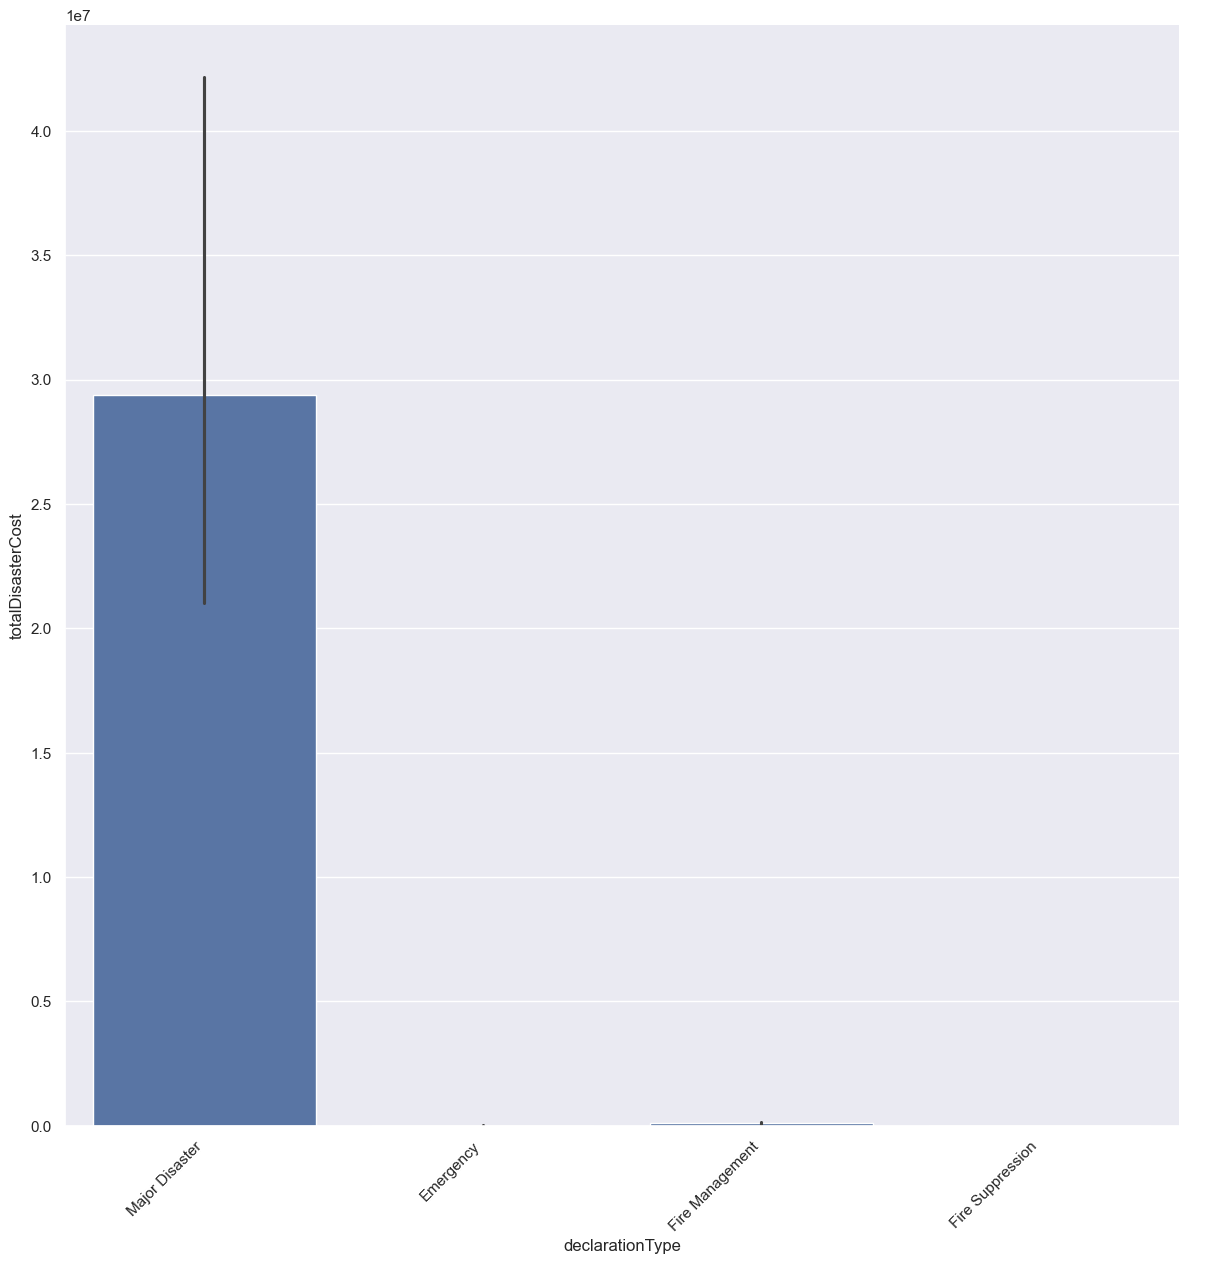

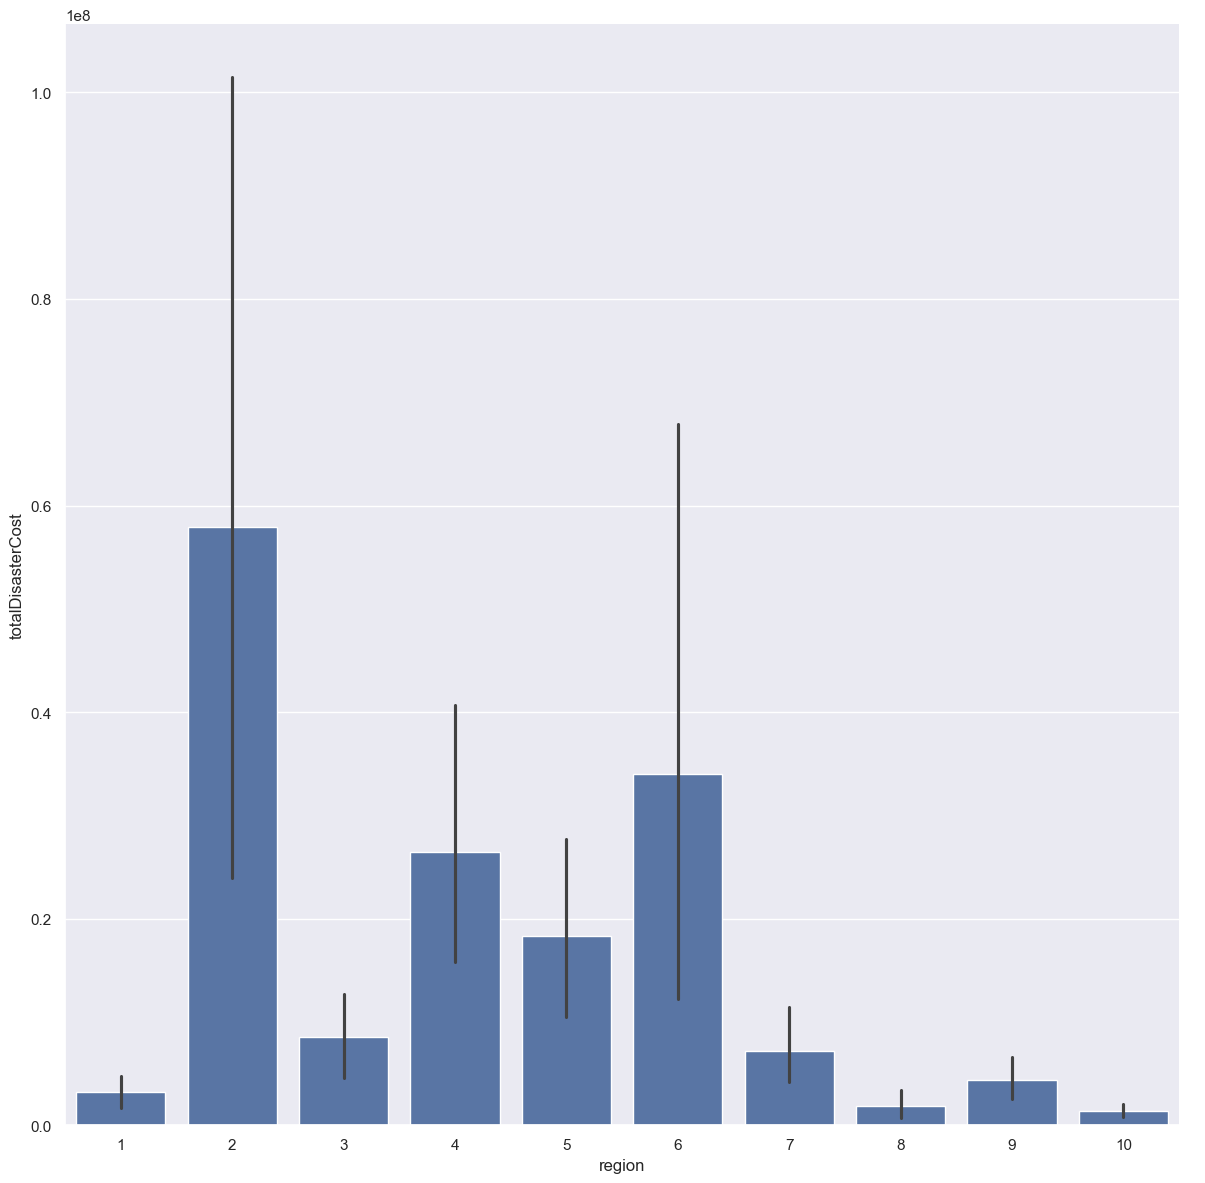

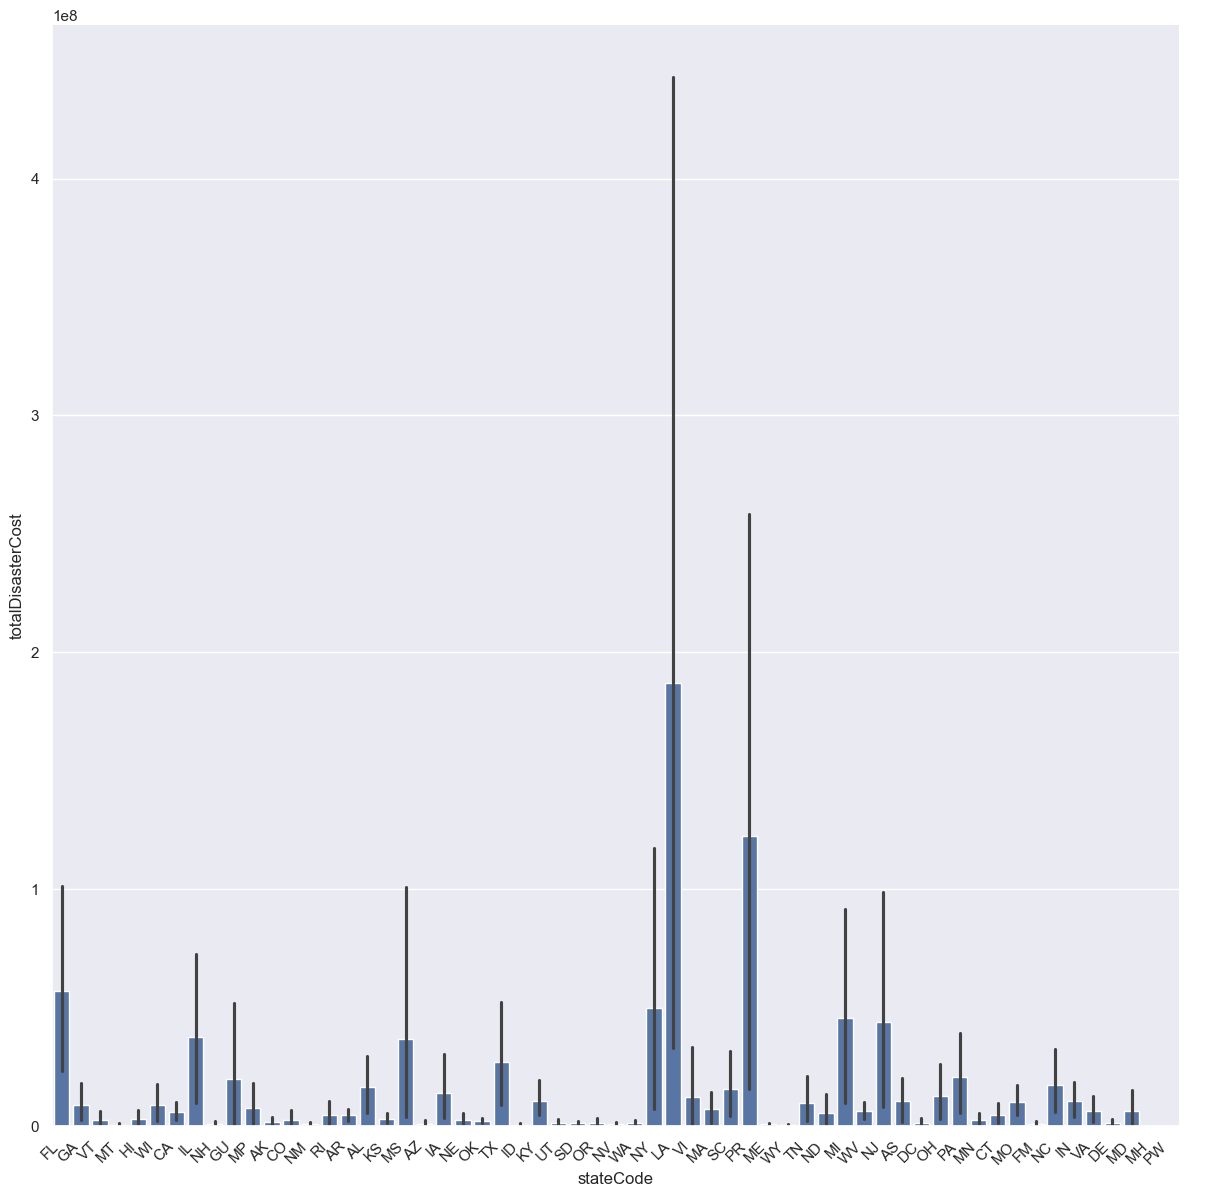

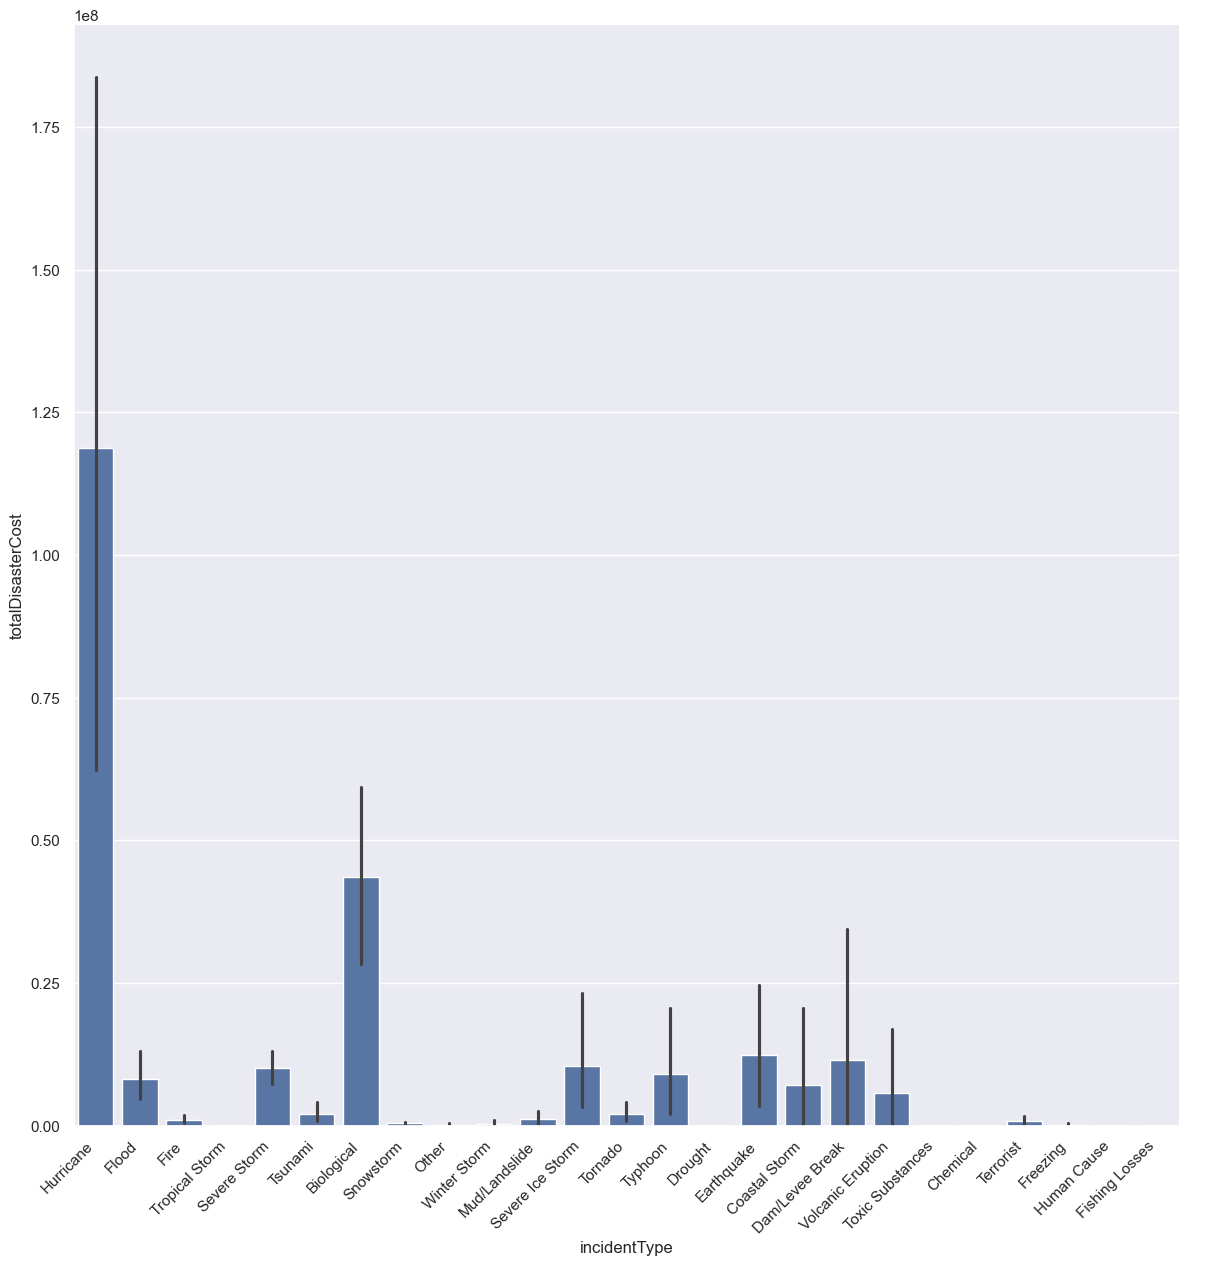

In [24]:
#plot categories vs total cost
pKind='bar' #“strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”
pHeight = 12
#fig, ax = plt.subplots(figsize=(18, 4))
p1 = sns.catplot(data=femaDataCleanV2, x='declarationType', y='totalDisasterCost', height=pHeight, kind=pKind)
p2 = sns.catplot(data=femaDataCleanV2, x='region', y='totalDisasterCost', height=pHeight, kind=pKind)
p3 = sns.catplot(data=femaDataCleanV2, x='stateCode', y='totalDisasterCost', height=pHeight, kind=pKind)
p4 = sns.catplot(data=femaDataCleanV2, x='incidentType', y='totalDisasterCost', height=pHeight, kind=pKind)

ax1 = p1.axes.flat[0]
ax2 = p2.axes.flat[0]
ax3 = p3.axes.flat[0]
ax4 = p4.axes.flat[0]


# Rotate X-Axis Labels Diagonally
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
#ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right") # diagonal not needed for region column
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha="right")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha="right")

plt.show()


In [25]:
print('declaration type is not useful. We can discard going forward.')

declaration type is not useful. We can discard going forward.


In [26]:
print('\n*"Biological" was an unexpected standout. Is it possibly due to COVID-19?\n')
femaDataCleanV2[femaDataCleanV2['disasterName'].str.contains('COVID')].head()


*"Biological" was an unexpected standout. Is it possibly due to COVID-19?



,Unnamed: 0,disasterNumber,declarationDate,disasterName,incidentBeginDate,incidentEndDate,declarationType,stateCode,stateName,incidentType,...,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,paLoadDate,iaLoadDate,totalObligatedAmountHmgp,hash_y,lastRefresh_y,id_y,totalDisasterCost
17,17,3485,2020-03-13T00:00:00.000Z,COVID-19,2020-01-20T00:00:00.000Z,2023-05-11T00:00:00.000Z,Emergency,NM,New Mexico,Biological,...,0.00,0.00,0.00,NaN,NaN,0.00,1c7f97e373446fc63622e7b81c76be735d705172,2023-03-18T13:22:12.883Z,513a7894-b438-4c41-975e-40e5f81b8ffd,0.00
30,30,3524,2020-03-13T00:00:00.000Z,COVID-19,2020-01-20T00:00:00.000Z,2023-05-11T00:00:00.000Z,Emergency,IA,Iowa,Biological,...,0.00,0.00,0.00,NaN,NaN,0.00,3e6c9d1b7528c872ace75b3b0e3287582686a73d,2023-03-18T13:22:12.883Z,e306adc3-0690-4095-b5d3-4c030961ebcb,0.00
59,59,3493,2020-03-13T00:00:00.000Z,COVID-19,2020-01-20T00:00:00.000Z,2023-05-11T00:00:00.000Z,Emergency,NE,Nebraska,Biological,...,0.00,0.00,0.00,NaN,NaN,0.00,0260b009c6ec4affd53cedd09fdf4576295a3221,2023-03-18T13:22:12.883Z,013e1c83-0935-412b-a7e8-d74ffa782b46,0.00
62,62,3510,2020-03-13T00:00:00.000Z,COVID-19,2020-01-20T00:00:00.000Z,2023-05-11T00:00:00.000Z,Emergency,NM,New Mexico,Biological,...,0.00,0.00,0.00,NaN,NaN,0.00,53c0e7c31baa049e8f4a7791593e92e0625ba51a,2023-03-18T13:22:12.883Z,493817e8-49d2-443d-b5b4-59613e5529f2,0.00
91,91,3522,2020-03-13T00:00:00.000Z,COVID-19,2020-01-20T00:00:00.000Z,2023-05-11T00:00:00.000Z,Emergency,LA,Louisiana,Biological,...,0.00,0.00,0.00,NaN,NaN,0.00,d9cac13f100d12f01d644be149ca74f17ff686b7,2023-03-18T13:22:12.883Z,754b4bd9-db58-40e5-bd48-6e5cc78a9bf1,0.00


In [27]:
femaDataCleanV2[femaDataCleanV2['disasterName'].str.contains('COVID')].describe()

,Unnamed: 0,disasterNumber,region,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,totalNumberIaApproved,totalAmountIhpApproved,totalAmountHaApproved,totalAmountOnaApproved,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,totalObligatedAmountHmgp,totalDisasterCost
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,701.38,3846.26,5.53,0.35,0.00,1.00,0.35,2970.69,19142734.90,0.00,19142734.90,488483631.52,472502118.04,0.00,5265845.51,43551315.32
std,212.21,493.93,2.56,0.48,0.00,0.00,0.48,7235.79,46850261.47,0.00,46850261.47,1888015971.14,1814620622.92,0.00,18225289.68,108995408.07
min,17.00,3427.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,729.00,3468.50,4.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,772.00,3510.00,6.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,813.50,4496.50,7.00,1.00,0.00,1.00,1.00,1457.50,10042169.57,0.00,10042169.57,194597651.20,187024263.26,0.00,2253864.12,22242369.64
max,855.00,4591.00,10.00,1.00,0.00,1.00,1.00,42690.00,275585763.22,0.00,275585763.22,15105205137.35,14531826835.32,0.00,177150366.09,681442069.27


In [28]:
femaDataCleanV2.groupby(['totalDisasterCost']).sum()
#femaDataCleanV2.groupby?

,Unnamed: 0,disasterNumber,declarationDate,disasterName,incidentBeginDate,incidentEndDate,declarationType,stateCode,stateName,incidentType,...,totalAmountOnaApproved,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,paLoadDate,iaLoadDate,totalObligatedAmountHmgp,hash_y,lastRefresh_y,id_y
totalDisasterCost,,,,,,,,,,,,,,,,,,,,,
0.00,9595147,7945429,2023-10-06T00:00:00.000Z2023-10-11T00:00:00.00...,SEVERE STORMS AND FLOODINGFLOODINGTROPICAL STO...,2023-08-03T00:00:00.000Z2023-06-01T00:00:00.00...,2023-08-05T00:00:00.000Z2023-06-08T00:00:00.00...,Major DisasterMajor DisasterEmergencyMajor Dis...,VTMTHICANHGUMPNMRIARKSMSAZAZAZIAAZCAHICACACANE...,Vermont Montana ...,FloodFloodHurricaneTropical StormFloodTropical...,...,0.00,4680476614.82,2491757433.41,255828068.85,2024-07-30T00:00:00.000Z2024-07-30T00:00:00.00...,0,0.00,c7a7b72402fdcc097825e3151d0364ae7b134dec5082c3...,2024-07-30T04:03:52.184Z2024-07-30T04:03:52.18...,0b414557-ebae-44f1-8aa8-ea110f604b1e0d8a297b-3...
359.00,1456,4147,2013-09-27T00:00:00.000Z,SEVERE STORMS AND FLOODING,2013-07-19T00:00:00.000Z,2013-07-21T00:00:00.000Z,Major Disaster,NM,New Mexico,Severe Storm,...,0.00,72568.60,0.00,70266.60,2024-07-30T00:00:00.000Z,0,359.00,11d9ba88ea6228fc4fb7f8ca2febe32711949636,2024-07-30T04:03:52.184Z,0481b153-4e9c-47d3-92b4-b94cd32ac939
929.91,1532,4102,2013-02-22T00:00:00.000Z,SEVERE STORMS AND FLOODING,2013-01-08T00:00:00.000Z,2013-01-17T00:00:00.000Z,Major Disaster,LA,Louisiana,Severe Storm,...,0.00,5926569.26,822112.42,4919885.84,2024-07-30T00:00:00.000Z,0,929.91,73c233bb54b8675209d25126614496106bd38f7d,2024-07-30T04:03:52.184Z,635ec96f-75e9-4bf7-8f94-c4d17fe0e1f0
1247.00,2179,1752,2008-05-05T00:00:00.000Z,"SEVERE STORMS, TORNADOES, AND FLOODING",2008-03-17T00:00:00.000Z,2008-03-23T00:00:00.000Z,Major Disaster,OK,Oklahoma,Severe Storm,...,0.00,3020576.08,82107.37,2836362.71,2024-07-30T00:00:00.000Z,0,1247.00,2b7596cf3069d4afb968d477eb3e25fe23a88b75,2024-07-30T04:03:52.184Z,313b5612-e60a-4652-b736-aaceea3fd581
1650.00,1160,4312,2017-05-02T00:00:00.000Z,FLOODING,2017-02-08T00:00:00.000Z,2017-02-11T00:00:00.000Z,Major Disaster,CA,California,Severe Storm,...,0.00,269934.77,36627.59,233307.18,2024-07-30T00:00:00.000Z,0,1650.00,494c136bb7152a8e180d2765f0c7e3302de98d5f,2024-07-30T04:03:52.184Z,0025f052-54f3-4fbb-ba35-bbe19e0ddf1a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920831179.89,2578,1604,2005-08-29T00:00:00.000Z,HURRICANE KATRINA,2005-08-29T00:00:00.000Z,2005-10-14T00:00:00.000Z,Major Disaster,MS,Mississippi,Hurricane,...,417891299.91,3218622939.83,1167843295.70,1821893613.35,2024-07-30T00:00:00.000Z,2024-07-29T00:00:00.000Z,333396230.91,a8162b2850039a0a11da76e3f318a7ab879b9770,2024-07-30T04:03:52.184Z,239cb2d4-0e77-4b55-8b23-a6766c0f156b
3118607432.51,1098,4339,2017-09-20T00:00:00.000Z,HURRICANE MARIA,2017-09-17T00:00:00.000Z,2017-11-15T00:00:00.000Z,Major Disaster,PR,Puerto Rico,Hurricane,...,568623456.69,33992346204.64,5378790970.76,26275729062.66,2024-07-30T00:00:00.000Z,2024-07-29T00:00:00.000Z,445219574.31,d8744c64f3e6f40dc4d01dc9afdaebb02eb18156,2024-07-30T04:03:52.184Z,52afc92b-a2a1-4ee0-b0de-ca2b82a30033
3415540914.83,1549,4085,2012-10-30T00:00:00.000Z,HURRICANE SANDY,2012-10-27T00:00:00.000Z,2012-11-08T00:00:00.000Z,Major Disaster,NY,New York,Hurricane,...,145978283.56,14736938984.56,2700641885.78,11860630921.59,2024-07-30T00:00:00.000Z,2024-07-29T00:00:00.000Z,1390387312.79,bb3e0a1b0dbf99ac781ed4b1f72fa59193f19470,2024-07-30T04:03:52.184Z,11639b4d-447d-4102-99a0-d5d477af9c45


In [29]:
#TO DO

'''
-limit the data based on date it was added so that each pull does not continually add more data
-more boxplots for outlier analysis
-ugly pair plots ... fix size, etc
'''

'\n-limit the data based on date it was added so that each pull does not continually add more data\n-more boxplots for outlier analysis\n-ugly pair plots ... fix size, etc\n'